# TRANSFER LEARNING_CA2

In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt  # Matplotlib for plotting
import numpy as np  # NumPy for numerical operations
import os  # OS module for interacting with the operating system
import tensorflow as tf  # TensorFlow for machine learning
import pathlib  # Pathlib for working with file paths

In [ ]:
from google.colab import drive # Import the 'drive' module from the 'google.colab' library
drive.mount('/content/drive') # add Google Drive to the '/content/drive' directory in Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = "/content/drive/MyDrive/All_Chocolate" # Define the base directory for the dataset
PATH = os.path.join(os.path.dirname(directory)) # Obtain the parent directory of the specified 'directory'
      # os.path.join is used to create a full path. PATH now holds the parent directory path.

train_dir = os.path.join(PATH) # Set the training directory path by joining the 'PATH' with itself
        # train_dir and PATH are the same.

validation_dir = os.path.join(PATH) # # Set the validation directory path by joining the 'PATH' with itself
          # validation_dir, train_dir, and PATH are all the same.

In [ ]:
# Set the batch size and image size for the datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# Specify the path to your training directory
train_dir = "/content/drive/MyDrive/All_Chocolate"
validation_dir = "/content/drive/MyDrive/All_Chocolate"

# Create the training dataset using TensorFlow's image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory( # image_dataset_from_directory creates training dataset into train_dataset
    train_dir,
    shuffle=True, # dataset is shuffled
    batch_size=BATCH_SIZE, # add batch size 32
    image_size=IMG_SIZE # add image size 160,160
)
# Create the validation dataset using TensorFlow's image_dataset_from_directory
validation_dataset = tf.keras.utils.image_dataset_from_directory( # image_dataset_from_directory creates testing dataset into train_dataset
    validation_dir,
    shuffle=True, # dataset is shuffled
    batch_size=BATCH_SIZE, # add batch size 32
    image_size=IMG_SIZE # add image size 160,160
)

# Get the class names from the training and validation datasets
class_names_train_dataset = train_dataset.class_names
class_names_validation_dataset = validation_dataset.class_names
class_names = class_names_train_dataset + class_names_validation_dataset

print("Class Names :", class_names)


Found 134 files belonging to 2 classes.
Found 134 files belonging to 2 classes.
Class Names : ['Dark Chocolate', 'White Chocolate', 'Dark Chocolate', 'White Chocolate']


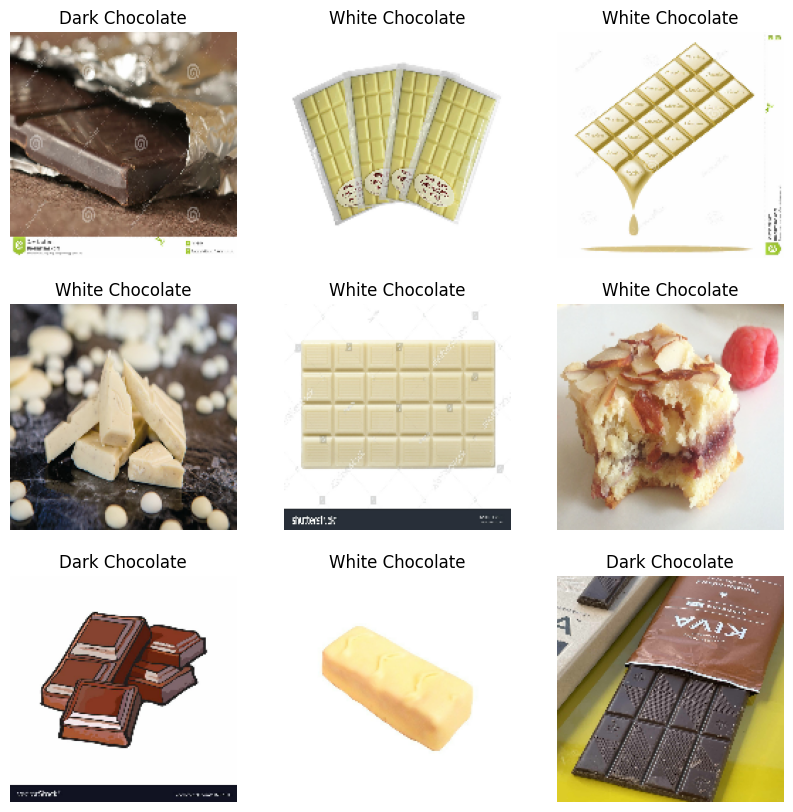

In [ ]:
# Show the first nine images and labels from the training set
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10)) # initializes a Matplotlib figure with a size of 10x10 inches, it will be used to display the images and labels.
for images, labels in train_dataset.take(1): # train_dataset.take(1) iterates through the training dataset to retrieve the first batch of images and labels using
  for i in range(9): # for i in range(9) is used to display the first nine images and their corresponding labels.
    ax = plt.subplot(3, 3, i + 1) # creates a subplot for each image in a 3x3 grid. i + 1 is used to determine the position of the subplot in the grid.
    plt.imshow(images[i].numpy().astype("uint8")) # plt.imshow(images[i].numpy().astype("uint8")) displays the current image as a uint8 array.
    plt.title(class_names[labels[i]]) # plt.title(class_names[labels[i]]) sets the title of the subplot to the corresponding class name of the current image
    plt.axis("off")

In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset) # Calculate the cardinality (number of batches) of the validation dataset
test_dataset = validation_dataset.take(val_batches // 5) # Create a test dataset by taking one-fifth of the validation dataset
validation_dataset = validation_dataset.skip(val_batches // 5) # Reduce the validation dataset by skipping one-fifth of its batches
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 1


In [ ]:
# Configure the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE # Use AUTOTUNE to dynamically adjust the prefetch buffer size
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE) # bringing earlier the training dataset for better performance
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE) # bringing earlier the validation dataset for better performance
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE) # bringing earlier the test dataset for better performance

In [ ]:
# Data Augmentation: it is a sequential model containing two data augmentation layers: random horizontal flipping and random rotation.
data_augmentation = tf.keras.Sequential([ # tf.keras.Sequential is a linear stack of layers. In this context, it is used to create a sequence of data augmentation layers.
  tf.keras.layers.RandomFlip('horizontal'), # tf.keras.layers.RandomFlip('horizontal') adds a layer to the sequential model that randomly flips input images horizontally.
  tf.keras.layers.RandomRotation(0.2), # The argument 0.2 represents the maximum absolute rotation angle in radians.
])

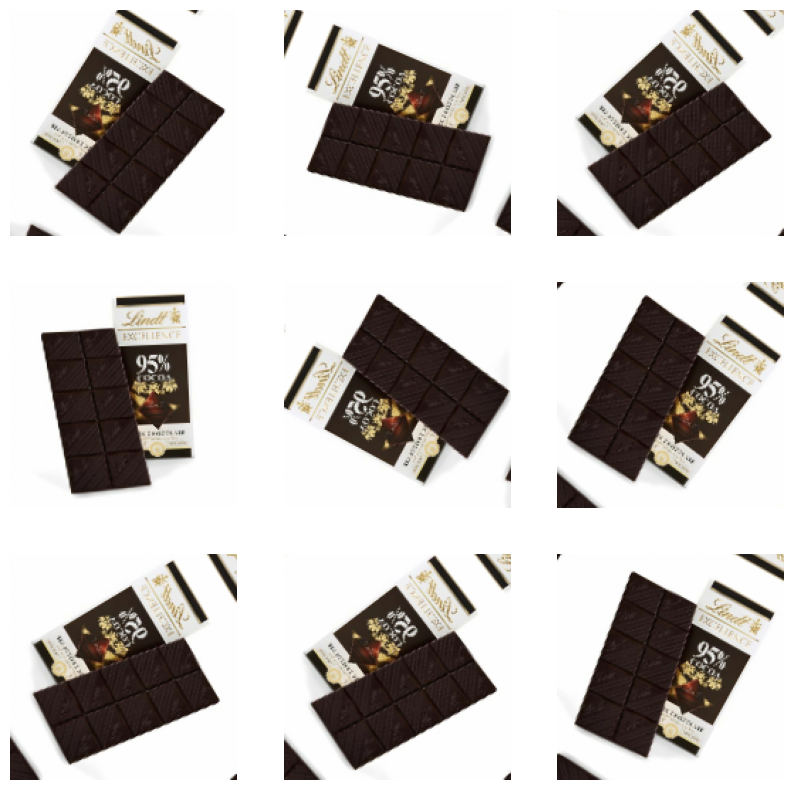

In [ ]:
for image, _ in train_dataset.take(1): # This loop iterates over the first batch (in this case, just one batch) of the training dataset.
  plt.figure(figsize=(10, 10)) # This line creates a new figure for plotting the augmented images. The figure size is set to 10x10 inches.
  first_image = image[0] # Extracts the first image from the batch. This will be the original image that will undergo data augmentation.
  for i in range(9): # it iterates nine times to generate and display nine augmented images.
    ax = plt.subplot(3, 3, i + 1) # Creates a subplot within a 3x3 grid to display each augmented image.
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0)) # applies data augmentation to the first image.
    plt.imshow(augmented_image[0] / 255) # the division by 255 scales the pixel values back to the [0, 1] range for proper visualization
    plt.axis('off') # turns off axis labels and ticks for a cleaner visualization.

In [ ]:
# Rescale pixel values
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)
# The 1./127.5 factor is used to scale the input pixel values. In this case, it divides the pixel values by 127.5. This scaling factor is often chosen to normalize pixel values to the range [-1, 1]
# The offset=-1 parameter adds a constant offset after applying the scaling. In this case, it subtracts 1 from the scaled values. This offset ensures that the normalized pixel values are centered around zero.

The Rescaling layer in TensorFlow is employed to normalize the pixel values of input images. The objective is to guarantee that the pixel values are confined to a predetermined range, usually [0, 1] or [-1, 1], prior to inputting the images into a neural network. Ensuring numerical stability and convergence of the training process is crucial.

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,) # IMG_SIZE likely represents the desired spatial dimensions of the images, and (3,) specifies that there are three color channels (red, green, and blue, or RGB).
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, # input_shape=IMG_SHAPE specifies the shape of the input images that the model will expect
                                               include_top=False, # include_top=False excludes the top (fully connected) layers of the MobileNetV2 model
                                               weights='imagenet') # weights='imagenet' specifies that pre-trained weights from the ImageNet dataset should be used.

In [ ]:
image_batch, label_batch = next(iter(train_dataset)) # next(iter(train_dataset)) uses the iter and next functions to create an iterator for the train_dataset and retrieves the next batch.
feature_batch = base_model(image_batch) # image_batch is passed through the pre-trained MobileNetV2 base model (base_model)
                # base_model extracts features from the images using the convolutional layers of the MobileNetV2 model.
print(feature_batch.shape)

(32, 5, 5, 1280)


# Feature Extraction

In [ ]:
# Freeze the convolutional base
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

Freezing the convolutional base in transfer learning entails maintaining the weights of the pre-trained convolutional layers unchanged and prohibiting any updates to them while training the new task-specific layers. This strategy carries various ramifications and advantages:

1- Retaining Pre-trained Knowledge: The convolutional base, commonly pre-trained on a vast dataset such as ImageNet, has acquired general characteristics and patterns from that dataset. By freezing the convolutional layers, it guarantees the preservation of important information and prevents it from being overwritten while training on the new task.

2- Feature Extraction: The frozen convolutional layers serve as an immutable feature extractor. The input images undergo feature extraction to obtain high-level features, which are subsequently transmitted to specialized layers trained for the new task.

3-Computational Efficiency: The process of training convolutional layers might need a significant amount of computational resources. By freezing them, the number of parameters that require updating during the training of the new layers is reduced, resulting in a more efficient overall training process, particularly when working with limited computational resources.

4-Preventing Overfitting: To mitigate overfitting, it is beneficial to immobilize the convolutional basis, particularly when dealing with a limited dataset for the new task. By maintaining the convolutional features in a stable state, you mitigate the possibility of the model acquiring task-specific features that may not exhibit good generalization to novel data.

Transfer Learning configuration: In a transfer learning configuration, it is customary to utilize a pre-trained model (known as the base model) and augment it with additional task-specific layers. By immobilizing the fundamental model and exclusively training the newly added layers, you exploit the information stored in the pre-trained model while customizing it for a distinct objective.

6-Fine-Tuning (Optional): Once the frozen convolutional base has been trained with the new layers, you have the option to fine-tune the entire model. Fine-tuning refers to the process of unfreezing certain or all of the convolutional layers and then proceeding to train them further on the current job. This stage enables the model to apply task-specific modifications to the previously acquired characteristics.

# Add a classification head

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # Creating a Global Average Pooling 2D layer
feature_batch_average = global_average_layer(feature_batch) # Applying the Global Average Pooling layer to the 'feature_batch'
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1) # Creating a Dense layer with 1 unit (neuron) for binary classification
prediction_batch = prediction_layer(feature_batch_average) # Applying the Dense layer to the output tensor from Global Average Pooling
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3)) # Defining the input shape for the model as (160, 160, 3)
x = data_augmentation(inputs) # Applying data augmentation to the input images
x = preprocess_input(x) # Preprocessing the input data using the base model's preprocessing function
x = base_model(x, training=False) # Passing the preprocessed input through the base model (with frozen convolutional base)
x = global_average_layer(x) # Applying Global Average Pooling to reduce spatial dimensions
x = tf.keras.layers.Dropout(0.2)(x) # Applying dropout with a rate of 0.2 for regularization
outputs = prediction_layer(x) # Generating model predictions using the Dense layer for binary classification
model = tf.keras.Model(inputs, outputs) # Creating the final model with defined input and output layers

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

1- Input Layer: This layer is the input layer of the model, specifically labelled "input_2". The shape of the model input is (None, 160, 160, 3), which means that it requires photos with size of 160x160 pixels and 3 colour channels.
The total number of parameters is 0 because the input layer does not contain any trainable parameters.

2- Sequential Layer: This appears to be a Sequential model or a comparable container. Nevertheless, it lacks comprehensive information in this context.
The total number of parameters for this layer is 0, which means that there are no trainable parameters in this layer.

3- Lambda Layer (tf.math.truediv): A lambda layer that carries out division operation on each element individually.
The total number of parameters for this layer is 0, which means that there are no trainable parameters in this layer.

4- Lambda Layer (tf.math.subtract): A lambda layer that carries out element-wise subtraction.
The total number of parameters for this layer is 0, which means that there are no trainable parameters in this layer.

5- MobileNetV2 Base Model: This represents the MobileNetV2 convolutional base model. The input photos are converted into feature maps with dimensions of (5, 5, 1280).
The MobileNetV2 model has a total of 2,257,984 parameters, which includes both weights and biases.

6 - The Global Average Pooling Layer: It  decreases the spatial dimensions of the input feature maps by computing the average value across all spatial locations.
The number of trainable parameters in this layer is zero, as it does not contain any trainable parameters.

7-Dropout Layer: This dropout layer does not apply any dropout in this particular situation. Dropout is a method used for regularization.
The total number of parameters for this layer is 0, indicating that there are no trainable parameters associated with it.

8-Dense Output Layer: A fully connected layer with 1 neuron for the purpose of binary categorization.
The total number of parameters is 1,281, which includes both weights and biases.

In [ ]:
len(model.trainable_variables)

2

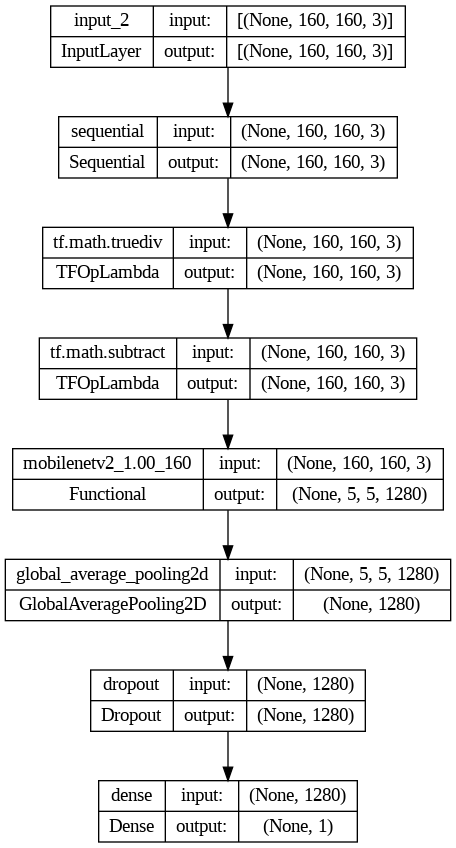

In [ ]:
# Visualizing building a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using
tf.keras.utils.plot_model(model, show_shapes=True)

# Compile Model

In [ ]:
# Setting the base learning rate for the model. It's a hyperparameter that controls the step size during optimization.
base_learning_rate = 0.0001

# model.compile is a method to configure the model for training.
# optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate) specifies the optimizer to be used during training
# loss=tf.keras.losses.BinaryCrossentropy(from_logits=True) sets the loss function for the training. Binary Crossentropy is a common choice for binary classification problems.
# metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')] defines the metrics used for evaluation during training. In this case, Binary Accuracy is chosen.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

# Train the Model

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

4/4 [==============================] - 6s 330ms/step - loss: 0.7183 - accuracy: 0.5392


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.72
initial accuracy: 0.54


We have initial accuracy to see which is low

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 12s 2s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.7078 - val_accuracy: 0.5392
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 0.7780 - accuracy: 0.5672 - val_loss: 0.6873 - val_accuracy: 0.5490
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.7497 - accuracy: 0.5672 - val_loss: 0.7104 - val_accuracy: 0.5392
Epoch 4/10
5/5 [==============================] - 9s 2s/step - loss: 0.7208 - accuracy: 0.5746 - val_loss: 0.6836 - val_accuracy: 0.5490
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.7146 - accuracy: 0.6045 - val_loss: 0.6692 - val_accuracy: 0.6078
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.6808 - accuracy: 0.6194 - val_loss: 0.6337 - val_accuracy: 0.6373
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.7271 - accuracy: 0.6045 - val_loss: 0.6494 - val_accuracy: 0.5784
Epoch 8/10
5/5 [=======================

The pre-trained model has already acquired valuable features from an extensive dataset, and you refine these characteristics on your smaller dataset that is tailored to your individual goal. The training procedure adjusts the model's weights to suit the new assignment while preserving the useful knowledge acquired during the initial pre-training. It is evident that both accuracy and validation accuracy improve with each epoch iteration.

# Learning Curves

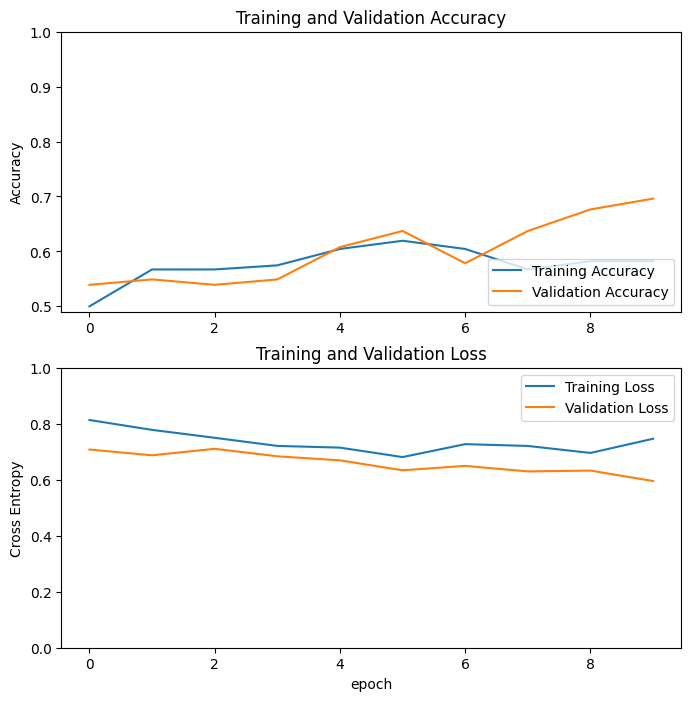

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine-Tuning

Un-Freeze the top layers of the model

In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


We un-freeze the uppermost layer to enable the model to modify and conform to the distinct characteristics and patterns found in the new target task. Unfreezing the upper layers offers several advantages for the following reasons:

1- Task-Specific features: The lower layers of a neural network often capture general properties that are beneficial for various tasks, such as edges and textures. As you ascend through the tiers, the characteristics become increasingly specialized for specific tasks. By thawing the uppermost layers, you enable the model to adjust these highly specific attributes in order to more effectively align with the requirements of your desired objective.

2- Fine-Tuning of High-Level Representations: The uppermost layers of a deep neural network comprise sophisticated representations and conceptual characteristics that may require adjustment to suit your particular objective. In an image classification task, the uppermost layers of the model may detect intricate patterns or combinations of objects that are exclusive to the dataset being used.

3- Domain Adaptation: The upper layers may acquire domain-specific information from the original work that is not applicable to the new task. By thawing and optimizing these layers, you enable the model to adjust its representations to the new domain.

4- Preventing Catastrophic Forgetting: When a model is originally trained on a vast and diverse dataset, the bottom layers acquire general features that have wide-ranging applicability. By freezing these layers, one can effectively mitigate the occurrence of "catastrophic forgetting," a phenomenon in which fine-tuning for a new task may lead to a decline in performance on the previous work. Unfreezing the top layers allows for task-specific modifications without deleting the broad knowledge obtained in the bottom layers.

Compile the Model

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

The number of trainable parameters increases as the weights and biases in these unfrozen layers become eligible for optimization.

1- Frozen Weights: When a pre-trained model is loaded, its weights are initially frozen, preventing them from being modified throughout the training of the new task. The model has already acquired significant features from a distinct dataset and task.

2- Additional Layers: When including new layers onto the pre-trained model for your particular task, these supplementary layers possess weights that are randomly initialized. During the initial stage of fine-tuning, only the weights in the newly added layers are adjusted, while the weights in the pre-trained layers remain unchanged.

3- Unfreezing Top Layers: When you choose to unfreeze and fine-tune the top layers of the pre-trained model, all the weights in these layers become adjustable. This encompasses the weights in convolutional layers, dense layers, or any other types of layers that are present in the unfrozen section of the model.

4- Enhanced Trainable Parameters: As the weights in the unfrozen layers are now open to optimization during training, the overall count of trainable parameters rises. The model possesses increased adaptability to modify its representations in the unfrozen layers in order to more effectively align with the patterns and attributes of the new task.

It should be noted that the augmentation of trainable parameters does not automatically imply that the model will possess a greater ability to overfit the training data.

In [ ]:
len(model.trainable_variables)

56

Continue training model

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
5/5 [==============================] - 16s 2s/step - loss: 0.6286 - accuracy: 0.7015 - val_loss: 0.4319 - val_accuracy: 0.7745
Epoch 11/20
5/5 [==============================] - 7s 1s/step - loss: 0.4140 - accuracy: 0.8284 - val_loss: 0.3107 - val_accuracy: 0.9118
Epoch 12/20
5/5 [==============================] - 9s 1s/step - loss: 0.3571 - accuracy: 0.8507 - val_loss: 0.2683 - val_accuracy: 0.9314
Epoch 13/20
5/5 [==============================] - 10s 2s/step - loss: 0.2236 - accuracy: 0.9403 - val_loss: 0.2280 - val_accuracy: 0.9216
Epoch 14/20
5/5 [==============================] - 7s 1s/step - loss: 0.2182 - accuracy: 0.9478 - val_loss: 0.2005 - val_accuracy: 0.9412
Epoch 15/20
5/5 [==============================] - 11s 2s/step - loss: 0.2224 - accuracy: 0.9254 - val_loss: 0.1710 - val_accuracy: 0.9314
Epoch 16/20
5/5 [==============================] - 10s 2s/step - loss: 0.1802 - accuracy: 0.9328 - val_loss: 0.1844 - val_accuracy: 0.9608
Epoch 17/20
5/5 [=============

We are currently achieving improved results in terms of accuracy and validation accuracy.

1- Task-Specific Features: The uppermost layers of a neural network frequently collect high-level features that are specific to the task at hand. By thawing and optimizing these layers, the model may adjust its representations to the particular patterns and attributes of your desired activity. This enables the model to acquire more pertinent and distinguishing characteristics for the new challenge.

2- Domain Adaptation: The uppermost layers may contain domain-specific information related to the original activity. By unfreezing these layers, the model can adjust its knowledge to the new domain, hence enhancing its capacity to generalize to the target task.

3- Enhanced Model Capacity: By unfreezing additional layers, the overall capacity of the model is increased. The extra capacity can be advantageous, particularly for intricate tasks that necessitate a more articulate model. It allows the model to comprehend complex connections within the data, which could potentially result in improved performance.

4- Knowledge Transfer: The pre-trained layers have already acquired valuable representations from a vast and varied dataset. By enabling the adjustment of these layers, the model may effectively apply the information acquired from the initial work to the subsequent task. The transmission of information can be pivotal, especially when confronted with a scarcity of labelled data for the intended objective.

5- Mitigating Task-Specific Prejudices: Occasionally, the bottom levels of a system acquire general characteristics that can be used in a variety of tasks, while the upper layers focus on specific aspects relevant to the work at hand. By unfreezing the top layers, the model is liberated from the limitations imposed by biases inherent in the original task, which may not be applicable to the new task.

In [ ]:
acc += history_fine.history['accuracy'] # Accumulating training accuracy for each fine-tuning session
val_acc += history_fine.history['val_accuracy'] # Accumulating validation accuracy for each fine-tuning session
loss += history_fine.history['loss'] # Accumulating training loss for each fine-tuning session
val_loss += history_fine.history['val_loss'] # Accumulate validation loss for each fine-tuning session

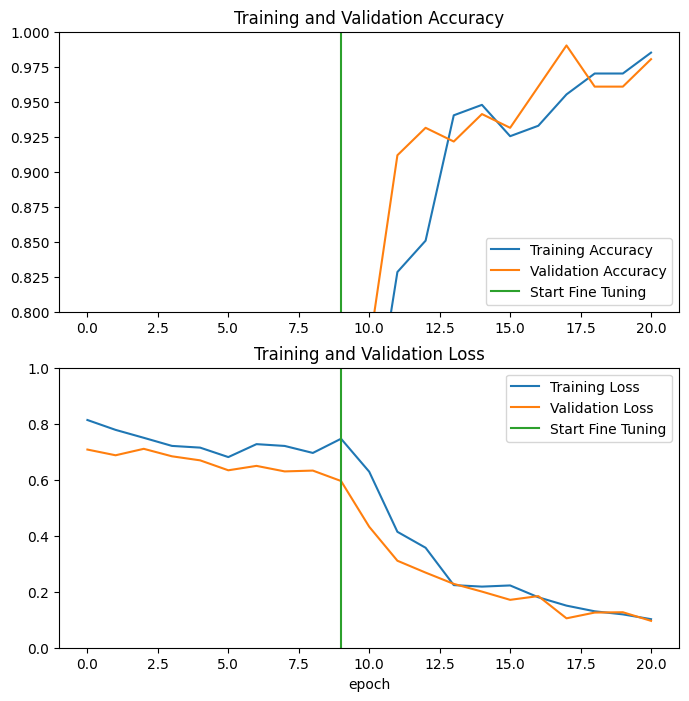

In [ ]:
# Plotting the Training and Validation Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')  # Plotting the training accuracy across fine-tuning sessions
plt.plot(val_acc, label='Validation Accuracy')  # Plotting the validation accuracy across fine-tuning sessions
plt.ylim([0.8, 1])  # Setting y-axis limits for better visualization
plt.plot([initial_epochs-1, initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')  # Marking the point where fine-tuning started
plt.legend(loc='lower right')  # Displaying legend in the lower-right corner
plt.title('Training and Validation Accuracy')  # Setting the title for the accuracy plot

# Plotting the Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')  # Plot the training loss across fine-tuning sessions
plt.plot(val_loss, label='Validation Loss')  # Plot the validation loss across fine-tuning sessions
plt.ylim([0, 1.0])  # Set y-axis limits for better visualization
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')  # Mark the point where fine-tuning started
plt.legend(loc='upper right')  # Display legend in the upper-right corner
plt.title('Training and Validation Loss')  # Set the title for the loss plot
plt.xlabel('epoch')  # Label the x-axis with 'epoch'
plt.show()


Upon unfreezing the top layers and compiling, we observe a significant decrease in the loss accuracy and validation loss on the graph. Simultaneously, there is a substantial rise in the accuracy and validation accuracy. Fine-tuning involves utilizing the acquired knowledge of a model from pre-training on a vast and varied dataset, and adjusting it to a more specific or specialized task within a certain domain. Fine-tuning is especially advantageous when you possess a restricted quantity of annotated data for the particular task you aim to address.

# Evaluation and Prediction

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.0532 - accuracy: 1.0000
Test accuracy : 1.0


# All set to use this model to predict

Predictions:
 [1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1]
Labels:
 [1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1]


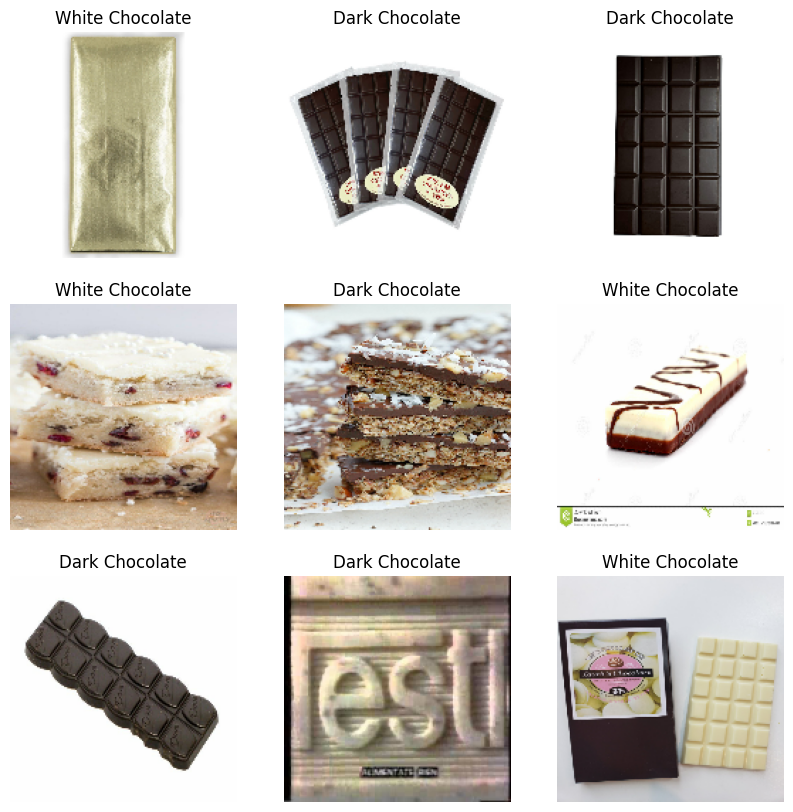

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten() # Making predictions on the image batch using the trained model
predictions = tf.nn.sigmoid(predictions) # Applying a sigmoid activation since our model returns logits
predictions = tf.where(predictions < 0.5, 0, 1) # Converting predictions to binary values (0 or 1) based on a threshold of 0.5

# Print the predicted labels and true labels
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10)) # Plotting a grid of images with their predicted class labels
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(image_batch[i].astype("uint8")) # Displaying he image


    # Set the title of the subplot with the predicted class label
    plt.title(class_names[predictions[i]])

    # Turn off axis labels
    plt.axis("off")


# REFERENCES

[1] https://www.tensorflow.org/tutorials/images/transfer_learning

[2] https://www.tensorflow.org/guide/data_performance

[3] https://www.youtube.com/watch?v=LsdxvjLWkIY&ab_channel=codebasics

[4] https://www.youtube.com/watch?v=jztwpsIzEGc&t=3977s&ab_channel=NicholasRenotte

[5] https://www.kaggle.com/code/theainerd/the-hitchiker-s-guide-to-cnn-with-fine-tuning/notebook#Transfer-Learning

[6] https://www.kaggle.com/code/theainerd/the-hitchiker-s-guide-to-cnn-with-fine-tuning

[7] https://elearning.dbs.ie/mod/resource/view.php?id=1475952

[8] https://elearning.dbs.ie/mod/url/view.php?id=1480453

[9] https://elearning.dbs.ie/mod/url/view.php?id=1480698

[10] https://elearning.dbs.ie/mod/url/view.php?id=1480700

[11] https://elearning.dbs.ie/mod/url/view.php?id=1480701